In [1]:
import sys
import time
import numpy as np
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix

from matplotlib import style

import matplotlib.pyplot as plt
from torchvision.datasets import MNIST

style.use('ggplot')

/usr/local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


label: 5
shapes: (6000, 784) (6000,)


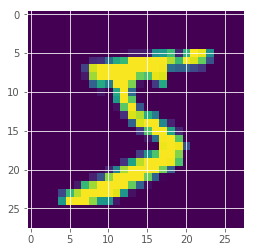

In [3]:
mnist = MNIST('.', train = True, download=True)
train_IMG = mnist.train_data.numpy().astype(float)
train_LABELS = mnist.train_labels.numpy()

plt.imshow(train_IMG[0])
print('label:', train_LABELS[0])

idx = np.random.permutation(len(train_IMG))[:n_samples]
train_img = train_IMG[idx]
train_labels = train_LABELS[idx]

X_train = train_img.reshape((train_img.shape[0],-1)) 
y_train = train_labels
print('shapes:', X_train.shape, y_train.shape)


label: 7
shapes: (1500, 784) (1500,)


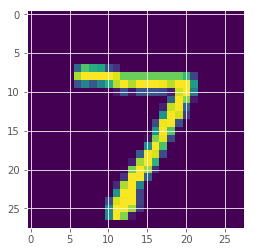

In [4]:
mnist_test = MNIST('.', train = False, download=True)
test_IMG = mnist_test.train_data.numpy().astype(float)
test_LABELS = mnist_test.train_labels.numpy()

plt.imshow(test_IMG [0])
print('label:', test_LABELS[0])

idx = np.random.permutation(len(test_IMG))[:1500]
test_img = test_IMG[idx]
test_labels = test_LABELS[idx]

X_test = test_img.reshape((test_img.shape[0],-1)) 
y_test = test_labels
print('shapes:', X_test.shape, y_test.shape)


time elapsed: 10.340525

Making Predictions on Test Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

Predicted Values:  [9 8 0 ... 4 1 4]

Accuracy of Classifier on Test Images:  0.9453333333333334

Confusion Matrix: 
 [[127   0   0   1   0   1   1   0   0   0]
 [  0 173   0   0   0   0   0   0   2   0]
 [  4   1 149   3   0   1   1   3   1   0]
 [  0   2   5 153   0   1   0   3   4   1]
 [  0   0   0   0 126   0   0   0   0   0]
 [  0   1   1   4   0 123   2   0   2   0]
 [  1   1   0   0   1   0 142   0   0   0]
 [  0   2   3   0   0   0   0 134   1   3]
 [  1   1   1   3   0   3   0   0 130   2]
 [  1   2   1   1   6   2   0   0   1 161]]


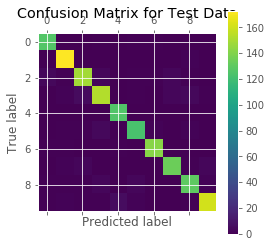

In [5]:
start = time.time()

clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train,y_train)

end = time.time()

print("time elapsed: %f" %(end-start))


print('\nMaking Predictions on Test Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)

print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Test Images: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




# Show the Test Images with Original and Predicted Labels
# a = np.random.randint(1,40,15)
# for i in a:
# 	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
# 	plt.title('Original Label: {0}  Predicted Label: {1}'.format(arr[test_labels[i]],arr[test_labels_pred[i]]))
# 	plt.imshow(two_d, interpolation='nearest')
# 	plt.show()
#---------------------- EOC ---------------------#

In [6]:
niter = 10
timediff = 0
avg_acc = 0

for i in range(niter):
    
    idx = np.random.permutation(len(train_IMG))[:n_samples]
    train_img = train_IMG[idx]
    train_labels = train_LABELS[idx]
    X_train = train_img.reshape((train_img.shape[0],-1)) 
    y_train = train_labels
    
    idx = np.random.permutation(len(test_IMG))[:1500]
    test_img = test_IMG[idx]
    test_labels = test_LABELS[idx]

    X_test = test_img.reshape((test_img.shape[0],-1)) 
    y_test = test_labels
    
    
    start = time.time()
    clf = svm.SVC(gamma=0.1, kernel='poly')
    clf.fit(X_train,y_train)
    end = time.time()
    timediff += end-start
    
    y_pred = clf.predict(X_test)
    
    avg_acc += accuracy_score(y_test, y_pred)

print("time elapsed: %f" %(timediff/niter))

print('\nAccuracy of Classifier on Test Images: ',avg_acc/niter)

time elapsed: 10.672570

Accuracy of Classifier on Test Images:  0.9490000000000001
